In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"COLUMN NAMES:\n{df[col].nunique()}") #gives the count of unigue values

COLUMN NAMES:
147
COLUMN NAMES:
2
COLUMN NAMES:
2
COLUMN NAMES:
2
COLUMN NAMES:
5
COLUMN NAMES:
3
COLUMN NAMES:
2
COLUMN NAMES:
7
COLUMN NAMES:
7
COLUMN NAMES:
8


In [9]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"COLUMN NAME:{col}\n{df[col].unique()}")

COLUMN NAME:CarName
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk

In [ ]:
# dropping car name column as it is not useful for prediction
df = df.drop('CarName', axis=1)

In [11]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"COLUMN NAME:{col}\n{df[col].unique()}")

COLUMN NAME:fueltype
['gas' 'diesel']
COLUMN NAME:aspiration
['std' 'turbo']
COLUMN NAME:doornumber
['two' 'four']
COLUMN NAME:carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
COLUMN NAME:drivewheel
['rwd' 'fwd' '4wd']
COLUMN NAME:enginelocation
['front' 'rear']
COLUMN NAME:enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
COLUMN NAME:cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
COLUMN NAME:fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [16]:
# to encode all the object columns
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

In [17]:
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


In [18]:
df.isnull().sum()

car_ID                   0
symboling                0
wheelbase                0
carlength                0
carwidth                 0
carheight                0
curbweight               0
enginesize               0
boreratio                0
stroke                   0
compressionratio         0
horsepower               0
peakrpm                  0
citympg                  0
highwaympg               0
price                    0
fueltype_diesel          0
fueltype_gas             0
aspiration_std           0
aspiration_turbo         0
doornumber_four          0
doornumber_two           0
carbody_convertible      0
carbody_hardtop          0
carbody_hatchback        0
carbody_sedan            0
carbody_wagon            0
drivewheel_4wd           0
drivewheel_fwd           0
drivewheel_rwd           0
enginelocation_front     0
enginelocation_rear      0
enginetype_dohc          0
enginetype_dohcv         0
enginetype_l             0
enginetype_ohc           0
enginetype_ohcf          0
e

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   wheelbase              205 non-null    float64
 3   carlength              205 non-null    float64
 4   carwidth               205 non-null    float64
 5   carheight              205 non-null    float64
 6   curbweight             205 non-null    int64  
 7   enginesize             205 non-null    int64  
 8   boreratio              205 non-null    float64
 9   stroke                 205 non-null    float64
 10  compressionratio       205 non-null    float64
 11  horsepower             205 non-null    int64  
 12  peakrpm                205 non-null    int64  
 13  citympg                205 non-null    int64  
 14  highwaympg             205 non-null    int64  
 15  price 

In [21]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [22]:
x = df.drop('price', axis=1)
y = df['price']

In [23]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [ ]:
# this is multinomial LR
modelLR = LinearRegression()
modelLR.fit(x_test, y_test)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
y_pred = modelLR.predict(x_test)

In [29]:
# testing accuracy
r2_score_test_acc = r2_score(y_test, y_pred)
print(f"R2 Score for test data: {r2_score_test_acc*100}")

R2 Score for test data: 99.18612489451469


In [30]:
# LR coefficents
slope = modelLR.coef_
intercept = modelLR.intercept_
print(f"Slope: {slope}\nIntercept: {intercept}")

Slope: [-7.84863091e+00 -4.29763798e+02  1.76907084e+03  4.61285823e+02
 -4.35993682e+03 -1.43591438e+03  3.48452629e+00  9.20345829e+02
 -4.51685085e+04 -3.24183790e+04 -9.71313094e+03 -2.74401802e+02
  1.02347464e+01  1.51560285e+03 -1.03348101e+03  3.87820957e+04
 -3.87820957e+04 -2.75612166e+03  2.75612166e+03 -3.67577615e+03
  3.67577615e+03 -1.27329258e-10 -4.48509256e+02 -1.57884987e+03
 -6.08221626e+02  2.63558075e+03  2.14257411e+02  4.19698706e+03
 -4.41124448e+03 -1.12777343e-10  1.45519152e-11 -6.54836185e-11
  0.00000000e+00  1.71453466e+04 -9.23466297e+03 -1.51042689e+04
 -1.32064855e+04  2.04000708e+04 -8.50620219e+04  1.32904916e+04
  3.56802423e+04 -1.45412937e+03  1.71453466e+04  0.00000000e+00
  2.04000708e+04 -4.32976617e+03 -1.52087441e+04  2.04000708e+04
  3.87820957e+04  0.00000000e+00 -1.04415630e+04 -2.92020932e+04
  0.00000000e+00]
Intercept: 345275.51179531333


<Axes: xlabel='price'>

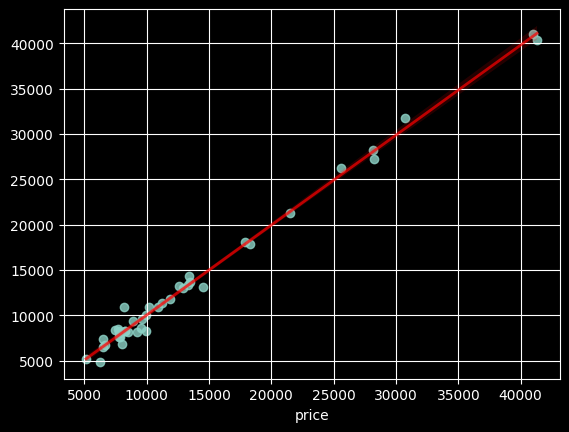

In [34]:
plt.style.use('dark_background')
plt.grid(True)
sns.regplot(x=y_test, y=y_pred, line_kws={"color":"r","alpha":0.7,"lw":2})

In [ ]:
# polynomial regression can be done using sklearn's PolynomialFeatures module
feature = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = feature.fit_transform(x_train)
x_test_trans = feature.transform(x_test)

modelPR = LinearRegression()
modelPR.fit(x_train_trans, y_train)
y_pred = modelPR.predict(x_test_trans)
print("The r2 score is: ", r2_score(y_test, y_pred)*100)
print("The mean absolute error is: ", mean_absolute_error(y_test, y_pred))
#mean_squared_error

The r2 score is:  -2336.8890378680767
The mean absolute error is:  25947.295856773497


<Axes: xlabel='price'>

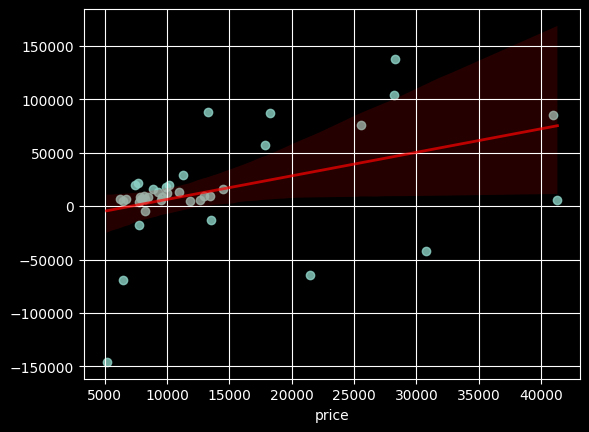

In [44]:
plt.grid(True)
sns.regplot(x=y_test,y=y_pred, line_kws={"color":"r","alpha":0.7,"lw":2})